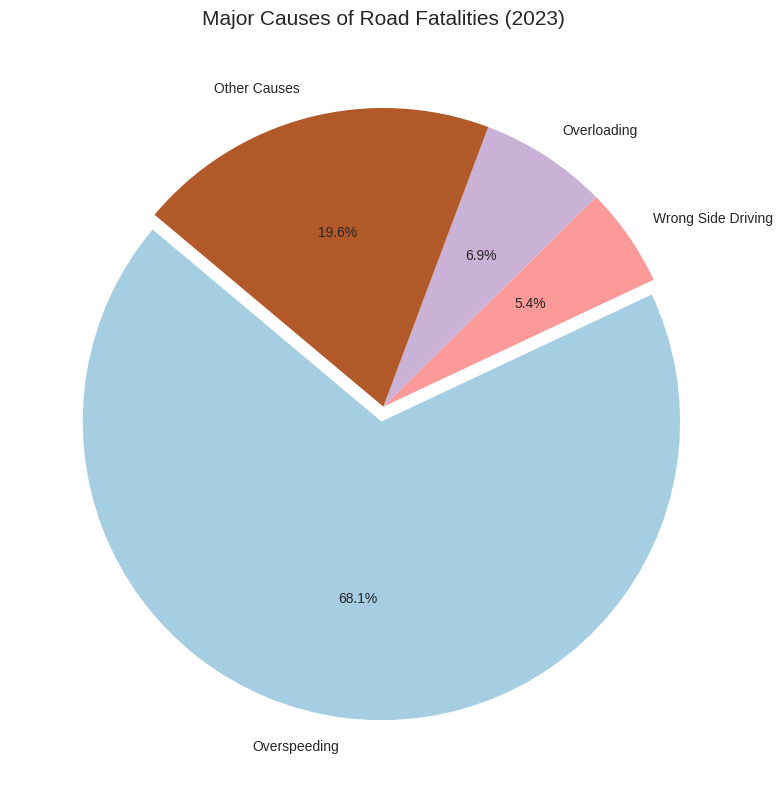

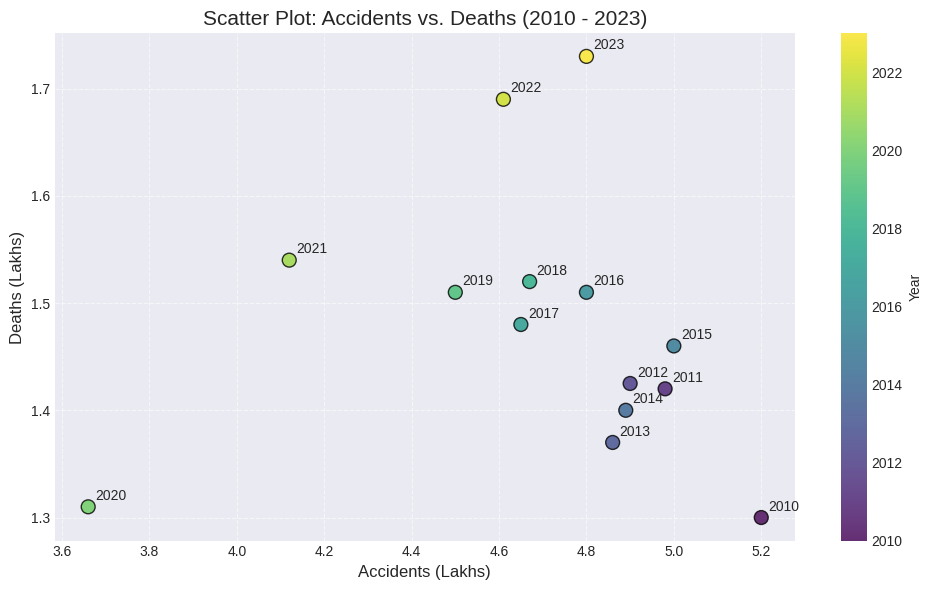

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading data
df_time = pd.read_csv('road_safety_data (1).csv')
df_time['Fatality Rate (%)'] = (df_time['Deaths (Lakhs)'] / df_time['Accidents (Lakhs)']) * 100
df_time['Fatality Rate (%)'] = df_time['Fatality Rate (%)'].round(2)

#  PIE CHART (2023 Focus)
total_2023_deaths = df_time.loc[df_time['Year'] == 2023, 'Deaths (Lakhs)'].iloc[0] * 100000
overloading_fatalities_2023 = 12000

overspeeding_percent = 68.1
wrong_side_percent = 5.4
overloading_percent = round((overloading_fatalities_2023 / total_2023_deaths) * 100, 1)

known_sum = overspeeding_percent + wrong_side_percent + overloading_percent
other_causes_percent = round(100.0 - known_sum, 1)

cause_data = {
    'Cause': ['Overspeeding', 'Wrong Side Driving', 'Overloading', 'Other Causes'],
    'Percentage': [overspeeding_percent, wrong_side_percent, overloading_percent, other_causes_percent]
}
df_causes = pd.DataFrame(cause_data)

#  PIE CHART: MAJOR CAUSES OF FATALITIES
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 8))
plt.pie(
    df_causes['Percentage'],
    labels=df_causes['Cause'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired(np.linspace(0, 1, len(df_causes))),
    explode=[0.05, 0, 0, 0]
)
plt.title('Major Causes of Road Fatalities (2023)', fontsize=15)
plt.tight_layout()
plt.savefig('fatality_causes_pie.png')

#  SCATTER PLOT:ACCIDENTS VS DEATHS (2010-2023)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_time['Accidents (Lakhs)'],
    df_time['Deaths (Lakhs)'],
    c=df_time['Year'],
    cmap='viridis',
    s=100,
    edgecolors='k',
    alpha=0.8
)
plt.colorbar(scatter, label='Year')
plt.xlabel('Accidents (Lakhs)', fontsize=12)
plt.ylabel('Deaths (Lakhs)', fontsize=12)
plt.title('Scatter Plot: Accidents vs. Deaths (2010 - 2023)', fontsize=15)

for i, txt in enumerate(df_time['Year']):
    plt.annotate(txt, (df_time['Accidents (Lakhs)'][i], df_time['Deaths (Lakhs)'][i]), xytext=(5,5), textcoords='offset points')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('accidents_deaths_scatter.png')


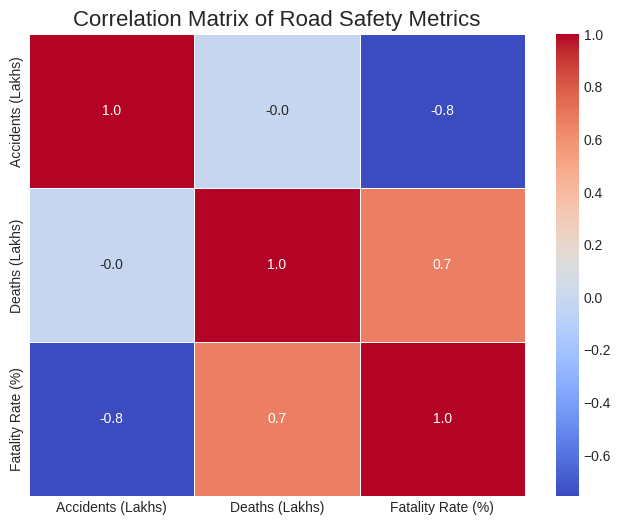

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cause_data = {
    'Cause': [
        'Overspeeding (2023)',
        'Wrong Side Driving (2022)',
        'Overloading (2023)',
        'Other Causes (e.g., Distracted Driving, Bad Roads, etc.)'
    ],
    'Percentage': [68.1, 5.4, 6.9, 19.6]
}
df_causes = pd.DataFrame(cause_data)
correlation_df = df_time[['Accidents (Lakhs)', 'Deaths (Lakhs)', 'Fatality Rate (%)']]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Correlation Matrix of Road Safety Metrics', fontsize=16)
plt.show()

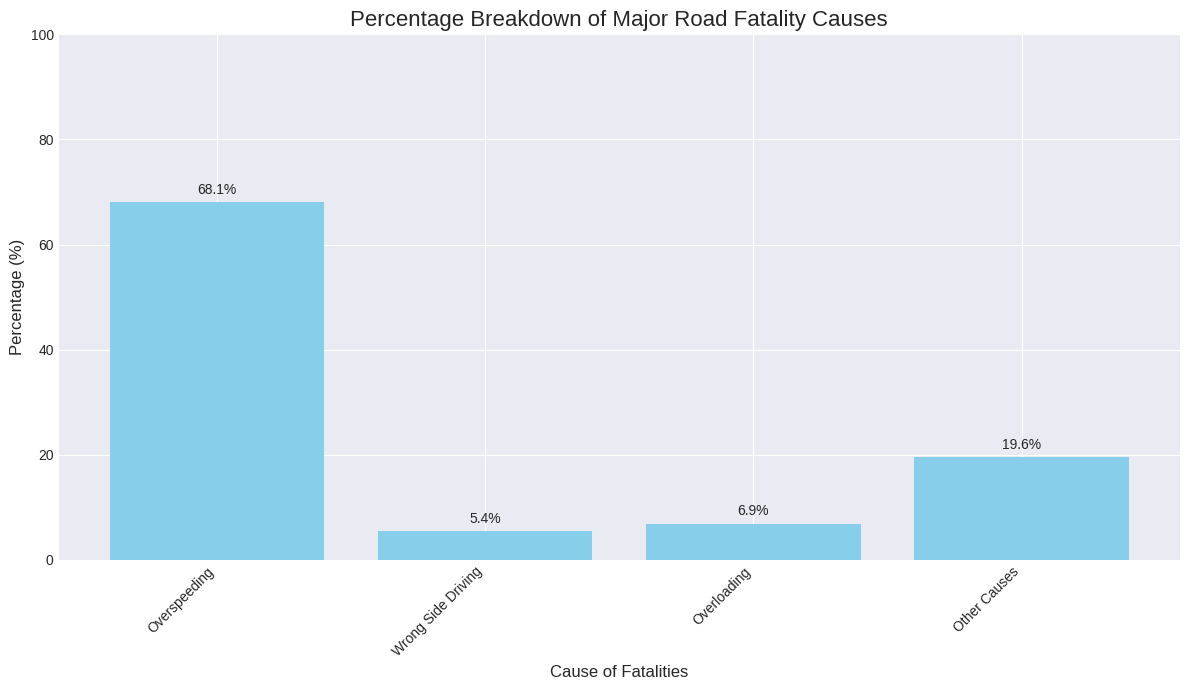

In [15]:
plt.figure(figsize=(12, 7))
plt.bar(df_causes['Cause'], df_causes['Percentage'], color='skyblue')

plt.xlabel('Cause of Fatalities', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage Breakdown of Major Road Fatality Causes', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
for index, row in df_causes.iterrows():
    plt.text(index, row['Percentage'] + 1, f'{row['Percentage']:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [13]:
#  AVERAGE FATALITY RATE
avg_fatality_rate = df_time['Fatality Rate (%)'].mean()
print(f"The Average Fatality Rate (Deaths per 100 Accidents) from 2010-2023 is: {avg_fatality_rate:.2f}%")

The Average Fatality Rate (Deaths per 100 Accidents) from 2010-2023 is: 31.71%
